In [6]:
!pip install tweety-ns
!pip install pysentimiento

In [7]:
from tweety import Twitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from credentials import username_t, password_t

pd.set_option('display.max_columns', None)

In [8]:
class TwitterScraper:
  def __init__(self, username: str, password: str, target: str):
    self.target     = target

    # init session
    self.app        = Twitter("session")
    self.app.start(username, password)
    self.app.sign_in(username, password)

    self.keys = []
    self.df = pd.DataFrame()

  def get_all_keys(self, data):
    keys = set()
    def extract_keys(obj, prefix=""):
      for key, value in obj.items():
        full_key = f"{prefix}.{key}" if prefix else key
        if not isinstance(value, dict):
          keys.add(full_key)
        if isinstance(value, dict):
          extract_keys(value, prefix=full_key)
    for item in data:
      if isinstance(item, dict):
        extract_keys(item)
    self.keys = list(keys)
    return
  def createDataFrame(self, data, keys):
    result_dict = {key: [] for key in keys}
    for item_ in data:
      for key in keys:
        splitted = key.split(".")
        current_value = item_
        try:
          for part in splitted:
            if current_value is not None and part in current_value:
              current_value = current_value[part]
            else:
              current_value = None
              break
          result_dict[key].append(current_value)
        except TypeError:
          result_dict[key].append(None)
    return result_dict

  def processTweets(self, tweets_arr):
    if not self.keys:
      self.get_all_keys(tweets_arr)
    data_df = self.createDataFrame(tweets_arr, self.keys)
    return pd.DataFrame(data_df)

  def joinToDataFrame(self, df_t):
    if self.df.empty:
      self.df = df_t
    else:
      self.df = pd.concat([self.df, df_t], axis=0, ignore_index=True)

  def downloadTargetTweets(self, pages=1, join: bool = True, returnIt:bool=False):
    user = self.app.get_user_info(self.target)
    user_tweets = self.app.get_tweets(user, pages=pages)
    processed = self.processTweets(user_tweets)
    self.joinToDataFrame(processed)
    if returnIt:
      return processed
    return

  def downloadTopicTweets(self, topic: str, pages: int = 1, join:bool=True, returnIt:bool=False):
    lookout = self.app.search(topic, pages=pages)
    processed = self.processTweets(lookout)
    self.joinToDataFrame(processed)
    if returnIt:
      return processed
    return

## Claudia Sheinbaum

In [9]:
target_t    = "Claudiashein"

cla_tts = TwitterScraper(username_t, password_t, target_t)

In [10]:
cla_tts.downloadTargetTweets()
cla_tts.downloadTopicTweets("Claudia Sheinbaum")

In [11]:
cla_tts.df.head()

,url,retweeted_tweet,rich_text.symbols,rich_text,rich_text.media,reply_counts,author.profile_image_url_https,author.translator_type,author.verified,author.notifications_enabled,author.location,author.is_blocked,author.can_dm,author.notifications,community_note,is_reply,id,quote_counts,community,author.normal_followers_count,author.possibly_sensitive,is_quoted,is_retweet,author.media_count,author.friends_count,author.date,edit_control.is_edit_eligible,is_space,has_newer_version,user_mentions,is_liked,author.community_role,author.profile_interstitial_type,source,author.pinned_tweets,media,comments,author.fast_followers_count,author.entities.description.urls,author.is_translator,author.username,can_reply,language,author.statuses_count,rich_text.text,author.profile_url,author.following,broadcast,author.profile_banner_url,author.name,rich_text.id,vibe,threads,bookmark_count,author.favourites_count,author.has_custom_timelines,date,place,voice_info,likes,retweet_counts,is_sensitive,author.listed_count,author.created_at,author.screen_name,tweet_body,edit_control.edits_remaining,rich_text.hashtags,edit_control.is_latest,pool,author.followers_count,created_on,text,hashtags,urls,rich_text.user_mentions,is_retweeted,rich_text.tags,author.bio,audio_space_id,edit_control.tweet_ids,has_moderated_replies,quoted_tweet,author.rest_id,rich_text.urls,symbols,author.description,author.protected,author.id,views,replied_to,edit_control.latest_tweet_id
0,https://twitter.com/Claudiashein/status/176187...,None,None,None,None,92,https://pbs.twimg.com/profile_images/165818582...,none,True,False,Ciudad de México,False,True,False,None,False,1761874140003250663,5,None,2830675,False,False,False,15397,1653,2012-05-26 21:48:47+00:00,True,False,False,[],False,None,None,Twitter for iPhone,None,"[{'display_url': 'pic.twitter.com/oyROqJZIBv',...",[],0,[],False,Claudiashein,True,es,34102,None,https://twitter.com/Claudiashein,False,None,https://pbs.twimg.com/profile_banners/59136119...,Dra. Claudia Sheinbaum,None,,[],5,1751,True,2024-02-25 22:01:43+00:00,None,None,593,195,False,2992,2012-05-26 21:48:47+00:00,Claudiashein,Esperen mañana nuestro podcast con Altagracia ...,4,None,True,None,2830675,2024-02-25 22:01:43+00:00,Esperen mañana nuestro podcast con Altagracia ...,[],[],None,False,None,"Científica, humanista, experta en cambio climá...",None,"[1761873390778941900, 1761874140003250663]",False,None,591361197,None,[],"Científica, humanista, experta en cambio climá...",False,591361197,14521,None,1761874140003250663
1,https://twitter.com/Claudiashein/status/176185...,None,None,None,None,98,https://pbs.twimg.com/profile_images/165818582...,none,True,False,Ciudad de México,False,True,False,None,False,1761854841809465437,6,None,2830675,False,False,False,15397,1653,2012-05-26 21:48:47+00:00,True,False,False,"[{'id': '197111315', 'name': 'Claudia Curiel d...",False,None,None,Twitter for iPhone,None,"[{'display_url': 'pic.twitter.com/F58x5OyLmh',...",[],0,[],False,Claudiashein,True,es,34102,None,https://twitter.com/Claudiashein,False,None,https://pbs.twimg.com/profile_banners/59136119...,Dra. Claudia Sheinbaum,None,,[],2,1751,True,2024-02-25 20:45:02+00:00,None,None,752,264,False,2992,2012-05-26 21:48:47+00:00,Claudiashein,Felicidades a la secretaria de cultura de la C...,5,None,True,None,2830675,2024-02-25 20:45:02+00:00,Felicidades a la secretaria de cultura de la C...,[],[],None,False,None,"Científica, humanista, experta en cambio climá...",None,[1761854841809465437],False,None,591361197,None,[],"Científica, humanista, experta en cambio climá...",False,591361197,20902,None,1761854841809465437
2,https://twitter.com/Claudiashein/status/176182...,None,None,None,None,1032,https://pbs.twimg.com/profile_images/165818582...,none,True,False,Ciudad de México,False,True,False,None,False,1761821108452438170,100,None,2830675,False,False,False,15397,1653,2012-05-26 21:48:47+00:00,True,False,False,[],False,None,None,Twitter for iPhone,None,"[{'display_url': 'pic.twitter.com/nJSUiqSL

## Xochitl Galvez

In [12]:
target_t    = "XochitlGalvez"
xo_tts = TwitterScraper(username_t, password_t, target_t)
xo_tts.downloadTargetTweets()
xo_tts.downloadTopicTweets("Xóchitl Gálvez")

In [13]:
xo_tts.df.head()

,url,quoted_tweet.author.profile_banner_url,broadcast.thumbnail_x_large,broadcast.thumbnail_large,retweeted_tweet,rich_text.symbols,rich_text,quoted_tweet.author.profile_url,rich_text.media,broadcast.broadcaster_name,quoted_tweet.author.date,reply_counts,broadcast.height,broadcast.source,author.profile_image_url_https,quoted_tweet.can_reply,quoted_tweet.broadcast,quoted_tweet.author.id,quoted_tweet.author.verified,author.translator_type,broadcast.user_id,broadcast.media_id,quoted_tweet.edit_control.latest_tweet_id,quoted_tweet.edit_control.edits_remaining,quoted_tweet.author.has_custom_timelines,author.verified,broadcast.broadcaster_id,author.notifications_enabled,broadcast.id,quoted_tweet.author.statuses_count,author.location,author.is_blocked,broadcast.title,author.can_dm,broadcast.broadcaster_username,quoted_tweet.is_liked,author.notifications,broadcast.url,community_note,is_reply,id,quoted_tweet.is_retweet,quote_counts,community,quoted_tweet.author.listed_count,author.normal_followers_count,author.possibly_sensitive,is_quoted,quoted_tweet.author.friends_count,quoted_tweet.author.location,is_retweet,author.media_count,quoted_tweet.edit_control.tweet_ids,quoted_tweet.replied_to,author.friends_count,author.date,quoted_tweet.author.favourites_count,edit_control.is_edit_eligible,is_space,has_newer_version,quoted_tweet.pool,user_mentions,quoted_tweet.author.created_at,is_liked,quoted_tweet.user_mentions,quoted_tweet.likes,quoted_tweet.community,author.community_role,quoted_tweet.author.pinned_tweets,author.profile_interstitial_type,quoted_tweet.created_on,source,quoted_tweet.voice_info,quoted_tweet.is_quoted,quoted_tweet.author.media_count,author.pinned_tweets,media,comments,quoted_tweet.retweeted_tweet,quoted_tweet.author.protected,author.fast_followers_count,quoted_tweet.author.name,author.entities.description.urls,quoted_tweet.author.notifications,quoted_tweet.is_reply,quoted_tweet.author.entities.url.urls,broadcast.media_key,quoted_tweet.media,quoted_tweet.author.followers_count,quoted_tweet.url,author.is_translator,author.username,can_reply,language,author.statuses_count,rich_text.text,quoted_tweet.place,author.profile_url,author.following,broadcast,author.profile_banner_url,author.name,rich_text.id,quoted_tweet.author.bio,vibe,quoted_tweet.author.profile_interstitial_type,threads,quoted_tweet.quote_counts,quoted_tweet.hashtags,bookmark_count,quoted_tweet.author.profile_image_url_https,quoted_tweet.author.description,author.favourites_count,author.has_custom_timelines,date,quoted_tweet.author.can_dm,quoted_tweet.author.is_translator,quoted_tweet.is_sensitive,broadcast.state,quoted_tweet.author.screen_name,place,quoted_tweet.date,quoted_tweet.author.rest_id,quoted_tweet.id,quoted_tweet.community_note,voice_info,quoted_tweet.rich_text,likes,retweet_counts,is_sensitive,broadcast.thumbnail_original,quoted_tweet.tweet_body,author.listed_count,quoted_tweet.author.username,quoted_tweet.audio_space_id,broadcast.width,quoted_tweet.retweet_counts,author.created_at,author.screen_name,tweet_body,quoted_tweet.author.normal_followers_count,edit_control.edits_remaining,quoted_tweet.author.notifications_enabled,quoted_tweet.edit_control.is_edit_eligible,broadcast.thumbnail_small,quoted_tweet.author.is_blocked,quoted_tweet.is_space,quoted_tweet.author.possibly_sensitive,broadcast.thumbnail,rich_text.hashtags,quoted_tweet.text,edit_control.is_latest,quoted_tweet.is_retweeted,pool,author.followers_count,created_on,text,hashtags,urls,quoted_tweet.quoted_tweet,quoted_tweet.reply_counts,quoted_tweet.edit_control.is_latest,quoted_tweet.symbols,rich_text.user_mentions,is_retweeted,rich_text.tags,author.bio,broadcast.username,quoted_tweet.author.following,quoted_tweet.author.community_role,audio_space_id,edit_control.tweet_ids,has_moderated_replies,quoted_tweet,quoted_tweet.bookmark_count,quoted_tweet.views,author.rest_id,rich_text.urls,symbols,quoted_tweet.source,author.description,author.protected,quoted_tweet.author.translator_type,author.id,quo

## Analysis

In [14]:
numeric_user_info = ["author.followers_count", "author.normal_followers_count", "author.friends_count", "author.favourites_count", "author.statuses_count", "author.media_count", "author.listed_count"]
numeric_cols_per_tweet = ["views", "retweet_counts", "quote_counts", "bookmark_count", "reply_counts", "likes"]

In [15]:
df_cla = cla_tts.df
df_xo = xo_tts.df
for col in numeric_user_info + numeric_cols_per_tweet:
  df_cla[col] = pd.to_numeric(df_cla[col], errors="coerce")
  df_xo[col] = pd.to_numeric(df_xo[col], errors="coerce")

In [16]:
cla_vals = []
xo_vals = []
for col in numeric_cols_per_tweet:
  cla_vals.append(df_cla[(df_cla["author.username"] == "Claudiashein")][col].sum())
  xo_vals.append(df_xo[(df_xo["author.username"] == "XochitlGalvez")][col].sum())

In [17]:
barWidth = 0.25
br1 = np.arange(len(cla_vals))
br2 = [x + barWidth for x in br1]

In [18]:
print(cla_vals)
print(xo_vals)

[8390298, 44542, 5560, 1399, 51687, 125856]
[5242563, 110093, 4747, 1607, 34274, 291660]


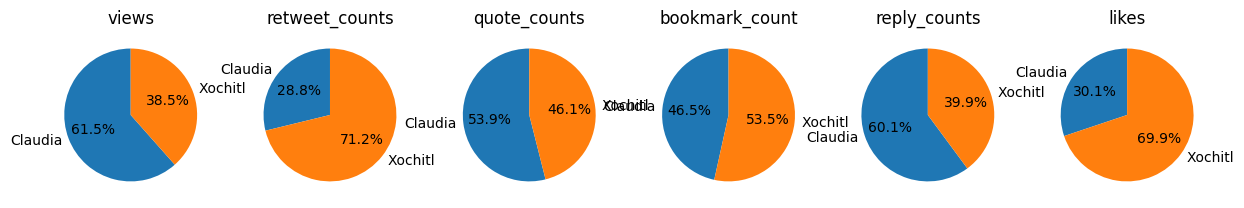

In [19]:
fig, axs = plt.subplots(1, len(cla_vals), figsize=(15, 5))

for i in range(len(cla_vals)):
    labels = ['Claudia', 'Xochitl']
    values = [cla_vals[i], xo_vals[i]]
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{numeric_cols_per_tweet[i]}')

plt.show()

In [20]:
clau_bio = df_cla[(df_cla["author.username"] == "Claudiashein")].iloc[[0]][numeric_user_info].to_numpy()[0]
xo_bio = df_xo[(df_xo["author.username"] == "XochitlGalvez")].iloc[[0]][numeric_user_info].to_numpy()[0]

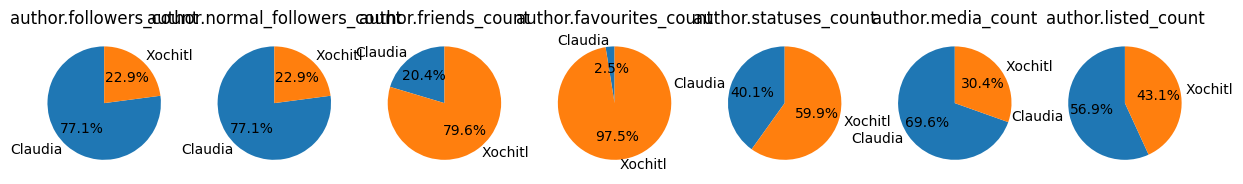

In [21]:
fig, axs = plt.subplots(1, len(clau_bio), figsize=(15, 5))

for i in range(len(clau_bio)):
    labels = ['Claudia', 'Xochitl']
    values = [clau_bio[i], xo_bio[i]]
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{numeric_user_info[i]}')

plt.show()

## Sentiment Analysis

In [29]:
from pysentimiento.preprocessing import preprocess_tweet
from pysentimiento import create_analyzer

In [30]:
preprocessed = preprocess_tweet(cla_tts.df.text[0])
analyzer = create_analyzer(task="sentiment", lang="es")
analyzer.predict(preprocessed)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

AnalyzerOutput(output=POS, probas={POS: 0.893, NEU: 0.097, NEG: 0.010})

In [31]:
cla_tts.df.text[0]

'Esperen mañana nuestro podcast con Altagracia Gómez, una gran joven empresaria. Platicamos sobre los planes que vienen por delante ¡No se lo pierdan! https://t.co/oyROqJZIBv'